# **Tast 3**

#IRIS FLOWER CLASSIFICATION

The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. 
Your objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.
Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

Author : Imtiyaj Ali Shaikh

Batch  : August
Domain : Data Science


**Import Library**

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


> DOWNLOADING DATASETS

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'], categories = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

*No Null value in the data so lets go for Visualization*

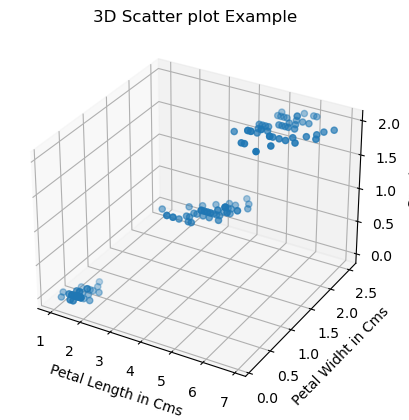

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax  = fig.add_subplot(111, projection = '3d')
ax.scatter (df.petal_length, df.petal_width, df.species)
ax.set_xlabel('Petal Length in Cms')
ax.set_ylabel('Petal Widht in Cms')
ax.set_zlabel('Species')
plt.title('3D Scatter plot Example')
plt.show()

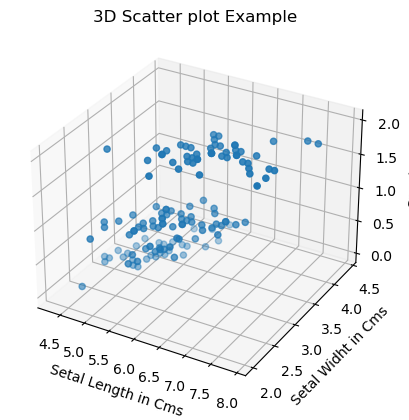

In [8]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection = '3d')
ax.scatter (df.sepal_length, df.sepal_width, df.species)
ax.set_xlabel('Setal Length in Cms')
ax.set_ylabel('Setal Widht in Cms')
ax.set_zlabel('Species')
plt.title('3D Scatter plot Example')
plt.show()

> Thus 3d Plot gives us the glimplse of species of iris flower is more inclined towards the variables petal length and petal width

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

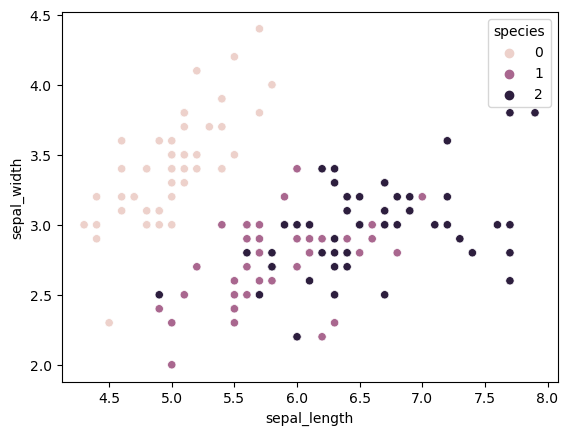

In [9]:
sns.scatterplot(data = df, x = 'sepal_length', y = 'sepal_width', hue = 'species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

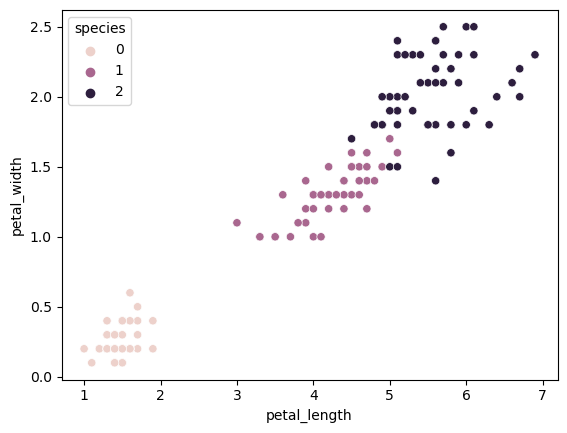

In [10]:
sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width', hue = 'species')

> Applying Elbow Technique

In [11]:
k_rng = range(1,10)
sse = []


for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['petal_length', 'petal_width']])
    sse.append(km.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [12]:
sse

[550.8953333333334,
 86.39021984551395,
 31.37135897435898,
 19.483000899685113,
 13.91690875790876,
 11.068446431864281,
 9.244804827285607,
 7.615402244955953,
 6.541584461432289]

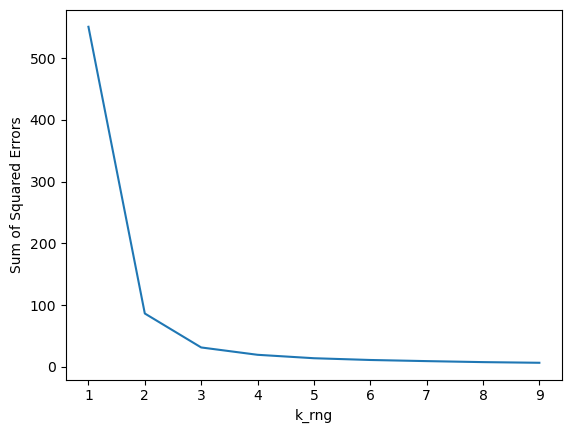

In [13]:
plt.xlabel('k_rng')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng, sse)

> Applying KMeans algorithm

In [14]:
km = KMeans (n_clusters = 3, random_state = 0)
y_predicted = km.fit_predict(df[['petal_length', 'petal_width']])
y_predicted

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [15]:
df['cluster'] = y_predicted
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


> Accuracy measure

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df.species, df.cluster)
cm

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 46,  4]])

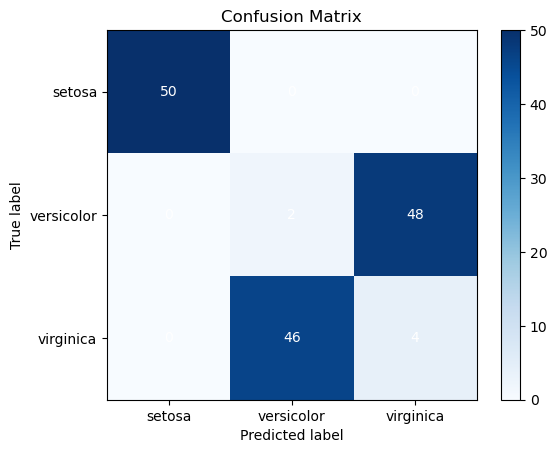

In [17]:
true_labels = df.species
predicted_labels = df.cluster

cm = confusion_matrix (true_labels, predicted_labels)
class_labels = ['setosa', 'versicolor', 'virginica']


#Plot Confusion Matrix

plt.imshow(cm, interpolation = 'nearest', cmap= plt.cm.Blues )
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

#fill matrix with values

for i in range (len(class_labels)):
    for j in range (len(class_labels)):
        plt.text(j, i, str(cm[i][j]),ha = 'center', va = 'center', color = 'white')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [18]:
# Split the dataset into training and testing sets
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train, X_test, y_train, y_test

(     sepal_length  sepal_width  petal_length  petal_width
 22            4.6          3.6           1.0          0.2
 15            5.7          4.4           1.5          0.4
 65            6.7          3.1           4.4          1.4
 11            4.8          3.4           1.6          0.2
 42            4.4          3.2           1.3          0.2
 ..            ...          ...           ...          ...
 71            6.1          2.8           4.0          1.3
 106           4.9          2.5           4.5          1.7
 14            5.8          4.0           1.2          0.2
 92            5.8          2.6           4.0          1.2
 102           7.1          3.0           5.9          2.1
 
 [120 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2

In [20]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled, X_test_scaled

(array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
        [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
        [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
        [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
        [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
        [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
        [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
        [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
        [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
        [-0.74255534,  2.32160658, -1.27600637, -1.44608785],
        [-0.01117388, -0.80864948,  0.78699794,  0.95664273],
        [ 0.23261993,  0.75647855,  0.44316389,  0.55618763],
        [ 1.08589829,  0.08570939,  0.55777524,  0.4227026 ],
        [-0.49876152,  1.87442714, -1.39061772, -1.04563275],
        [-0.49876152,  1.4272477 , -1.27600637, -1.31260282],
        [-0.37686461, -1.47941864, -0.01528151, -0.24472256],
        

In [22]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [23]:
# Train the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
# Make predictions
y_pred = knn.predict(X_test_scaled)

In [25]:
# Convert unique species names to a list of strings
species_names = df['species'].unique().astype(str).tolist()

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=species_names)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

